##  Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [4]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k = 0.051;
el_link = 0.0

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k, el_link]


p = [a, b, c, d, s, xr, r, I, xv, k, el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );
ds_HR1

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.051, 0.0]

In [5]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.051, 0.0]

In [65]:
tr = trajectory(ds_HR1, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

xsum = tr[:, 1] + tr[:, 4]
xsum = xsum[floor(Int, length(xsum) / 2):end ];
x1 = tr[:, 1]
y1 = tr[:, 2]
z1 = tr[:, 3];
x1 = x1[floor(Int, length(x1) / 2):end ];
y1 = y1[floor(Int, length(y1) / 2):end ];
z1 = z1[floor(Int, length(z1) / 2):end ];

In [66]:
tr1 = trajectory(ds_HR2, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

xsum1 = tr1[:, 1] + tr1[:, 4]
xsum1 = xsum1[floor(Int, length(xsum1) / 2):end ];
x11 = tr1[:, 1]
y11 = tr1[:, 2]
z11 = tr1[:, 3];
x11 = x11[floor(Int, length(x11) / 2):end ];
y11 = y11[floor(Int, length(y11) / 2):end ];
z11 = z11[floor(Int, length(z11) / 2):end ];

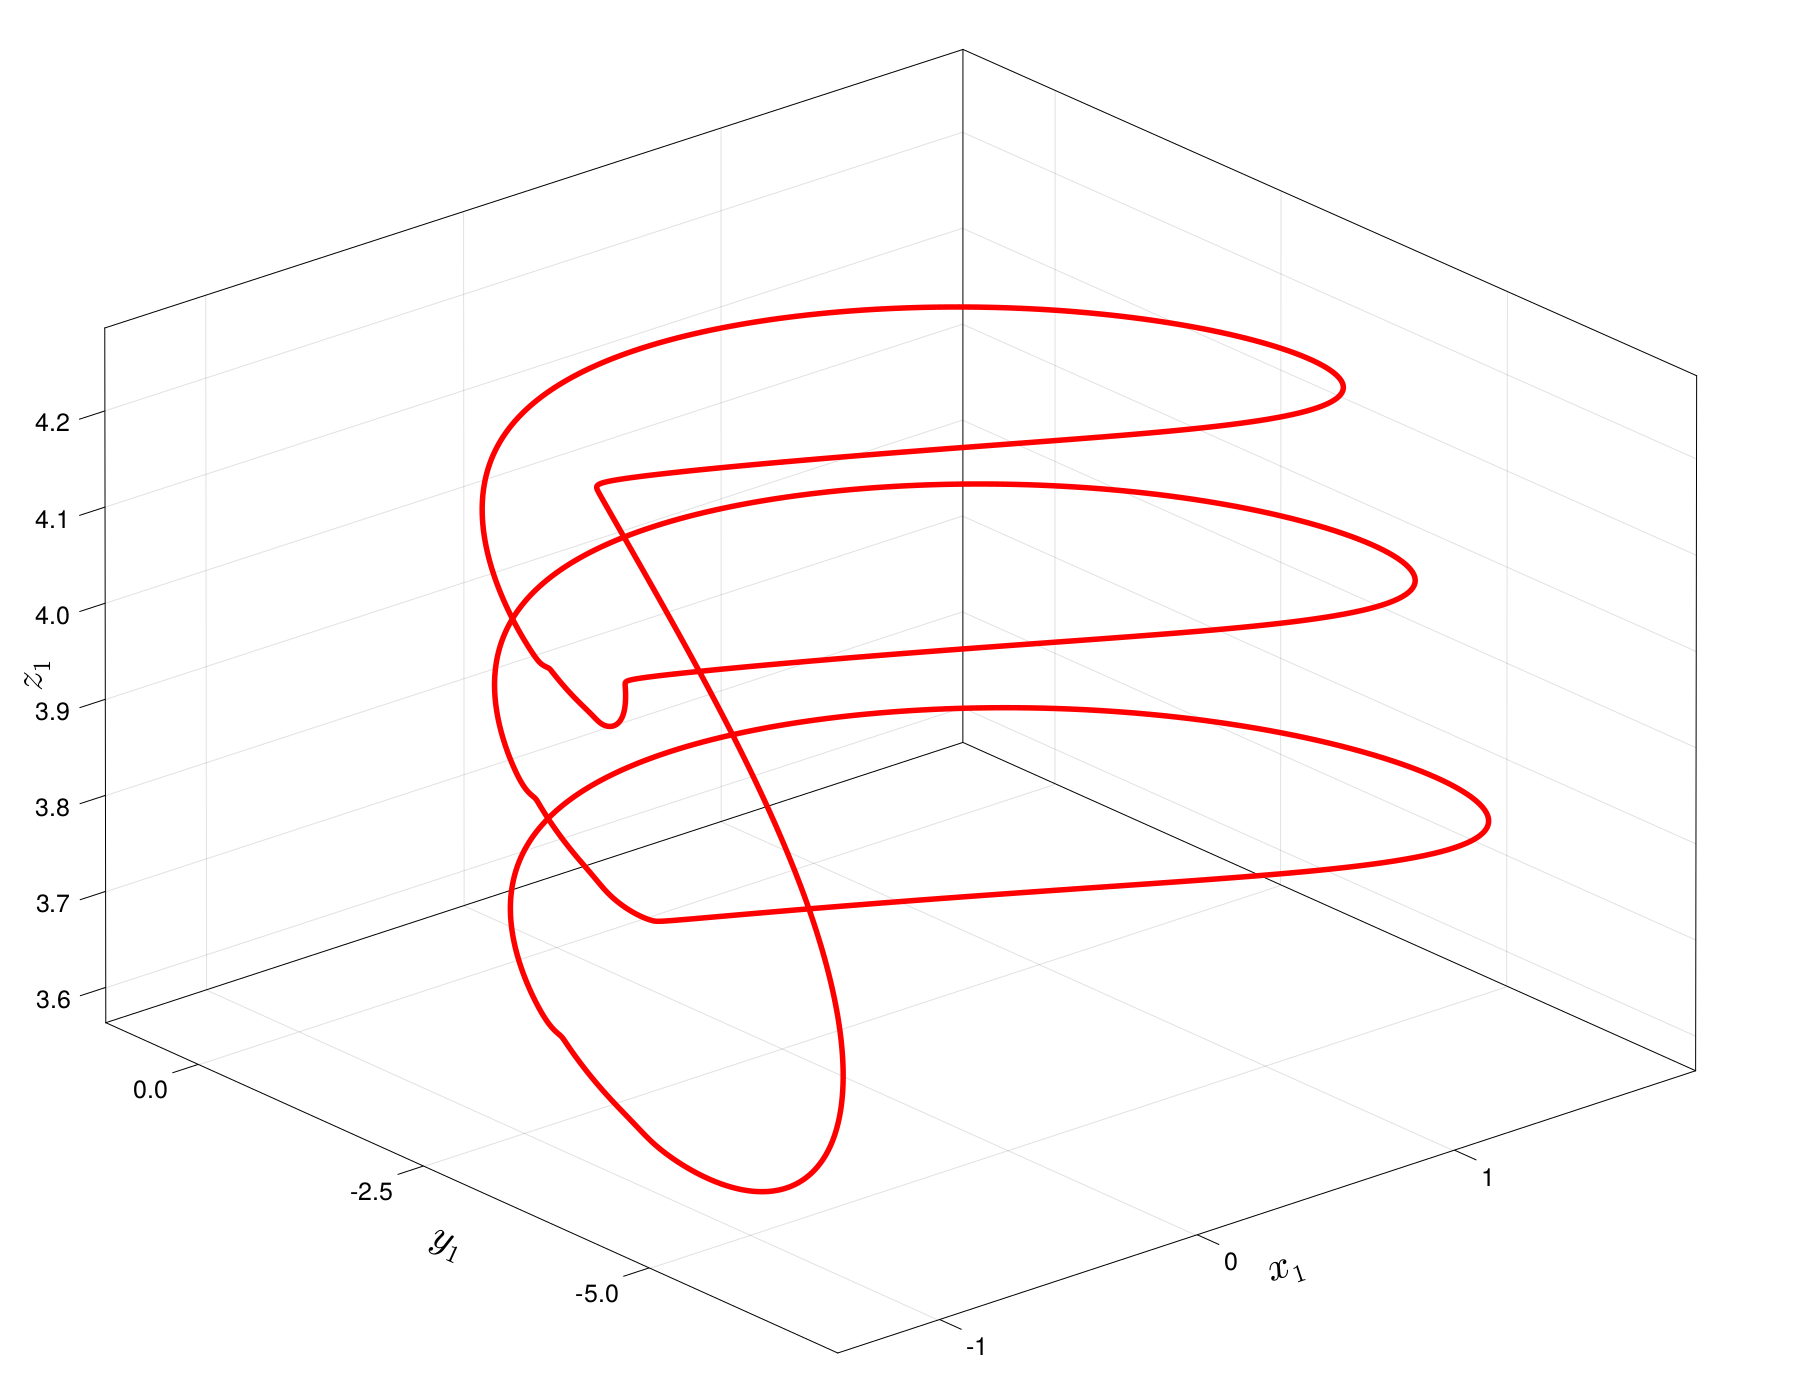

In [67]:
f = Figure(resolution = (1800, 1400))
ts, tf = 1, 200000

ax = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 40, ylabelsize = 40, zlabelsize = 40,
                xticklabelsize = 25, yticklabelsize = 25, zticklabelsize = 25  )

lines!(ax, x1[ts:tf], y1[ts:tf], z1[ts:tf], linewidth = 5.5, color = "red" )


f

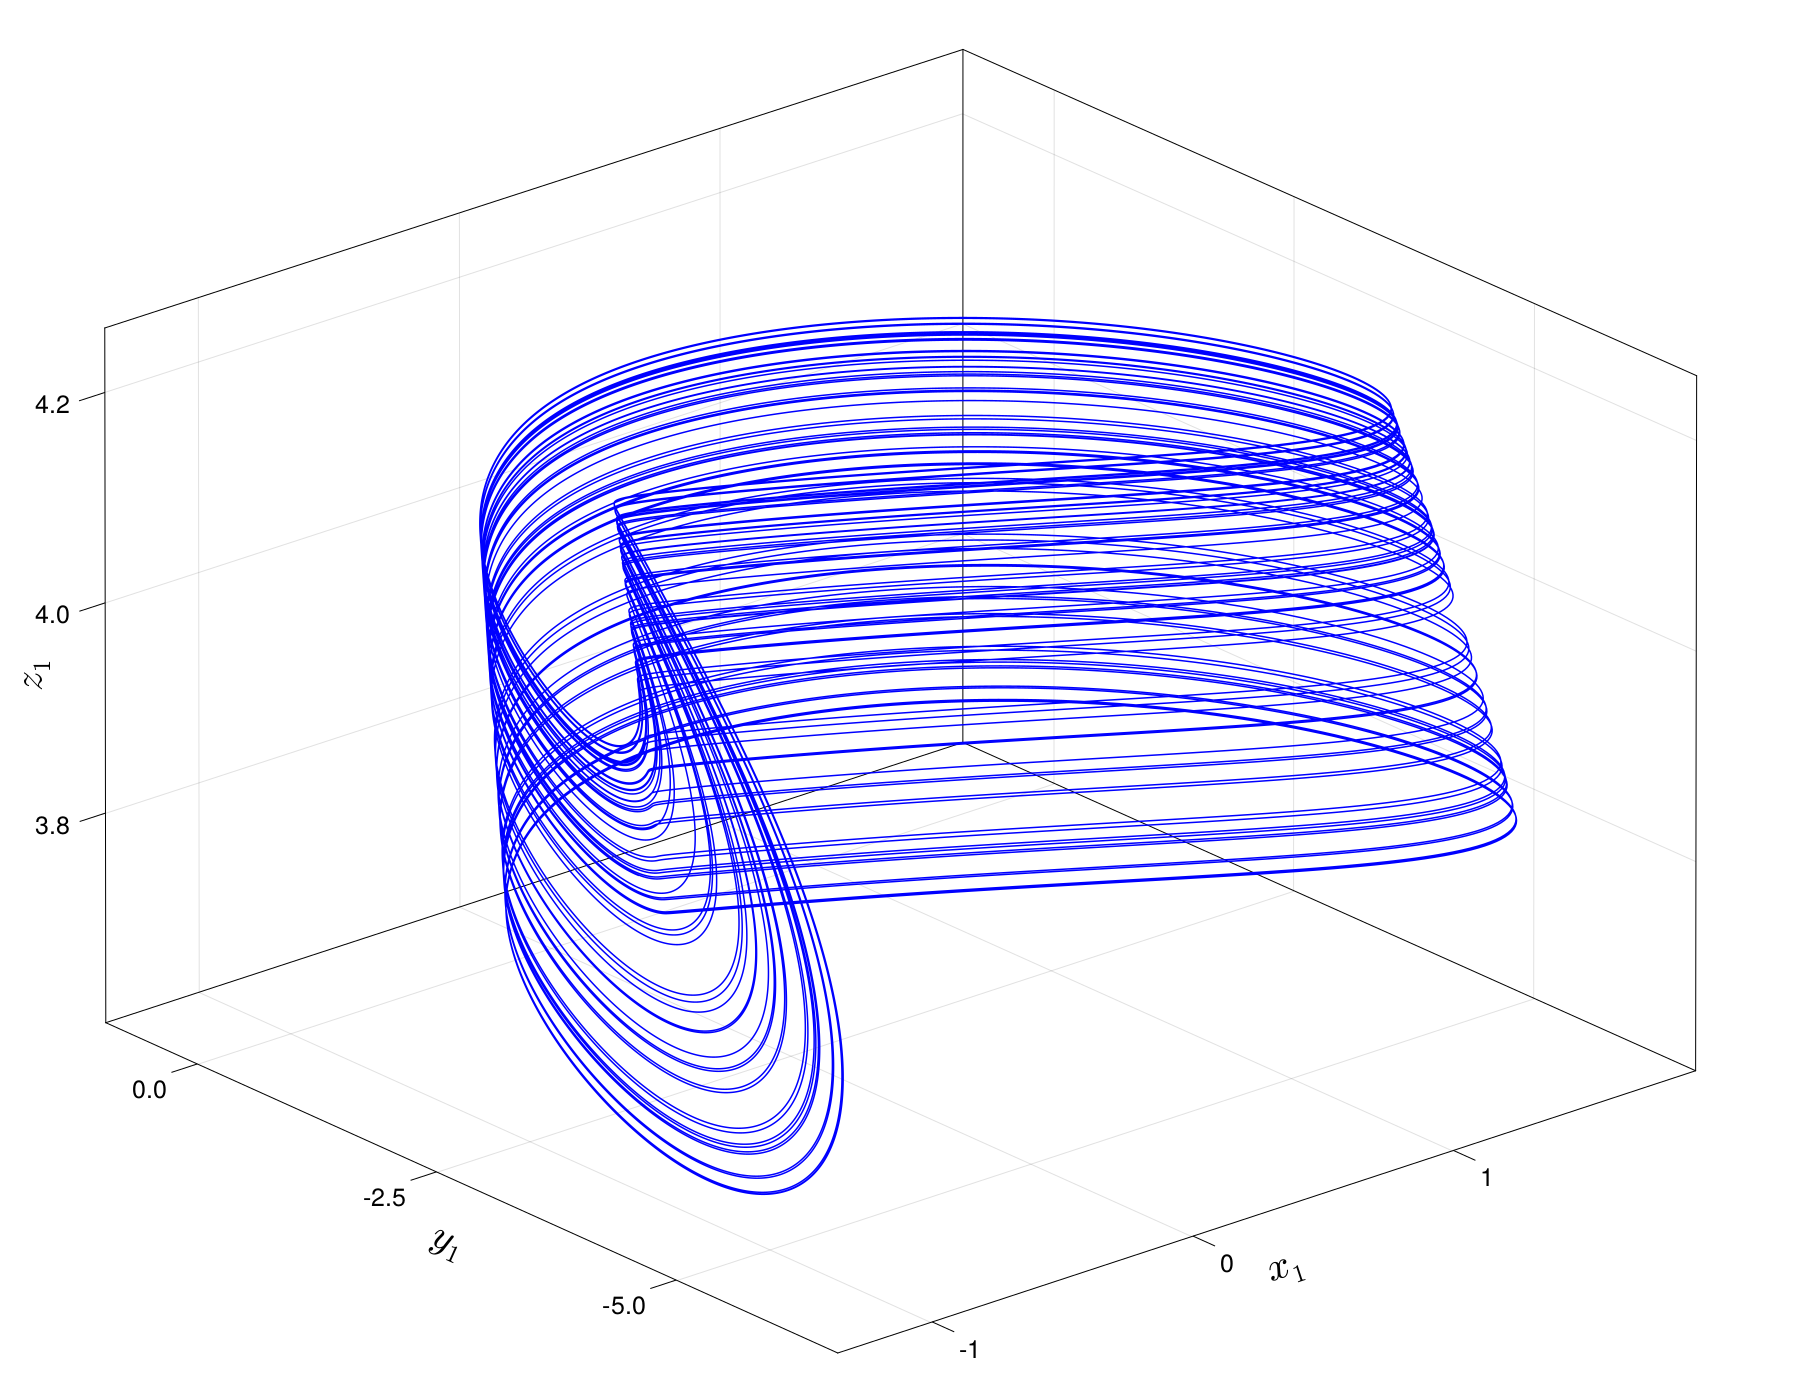

In [68]:
f = Figure(resolution = (1800, 1400))
ts, tf = 1, 200000

ax = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 40, ylabelsize = 40, zlabelsize = 40,
                xticklabelsize = 25, yticklabelsize = 25, zticklabelsize = 25  )

lines!(ax, x11[ts:tf], y11[ts:tf], z11[ts:tf], linewidth = 1.5, color = "blue" )


f

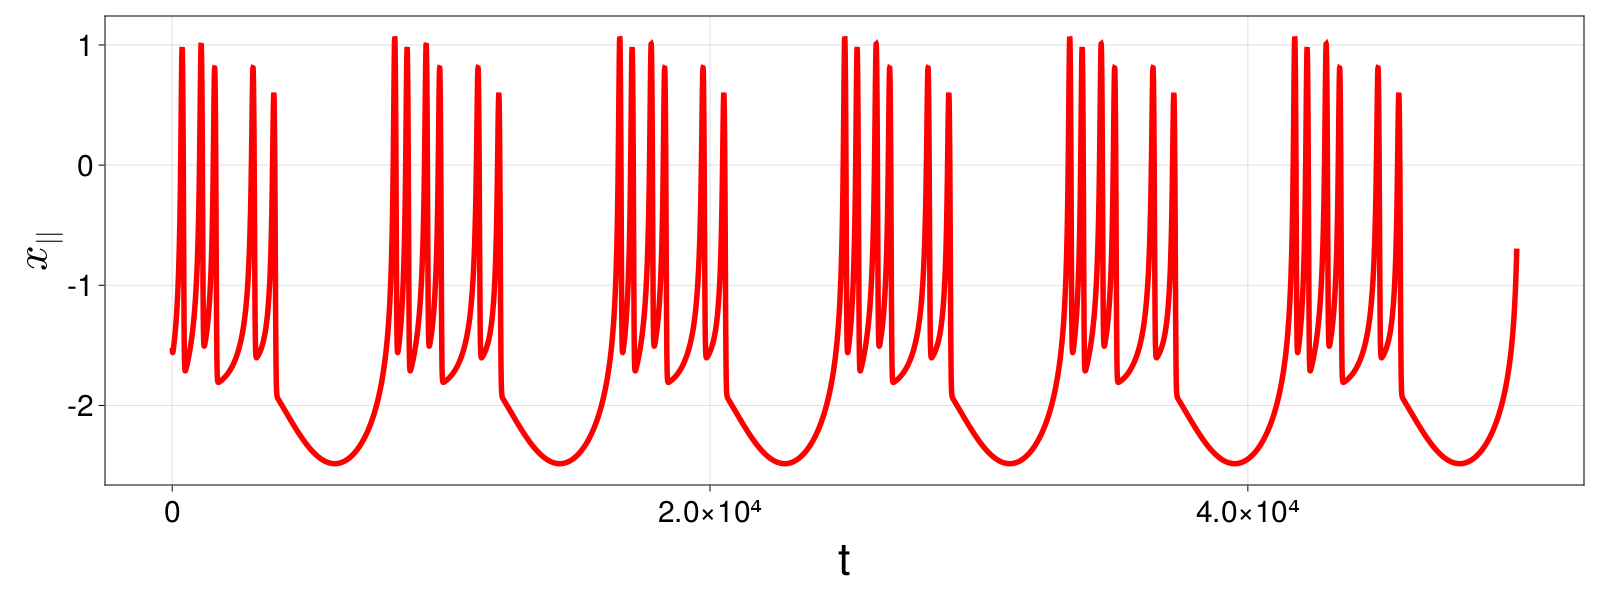

In [69]:
f = Figure(resolution = (1600, 600), fontsize = 35)
ax = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{||}",
xlabelsize = 45, ylabelsize = 45, xticklabelsize = 30, yticklabelsize = 30  )
lines!(xsum[1:50000], linewidth = 5.5, color = "red" )
f

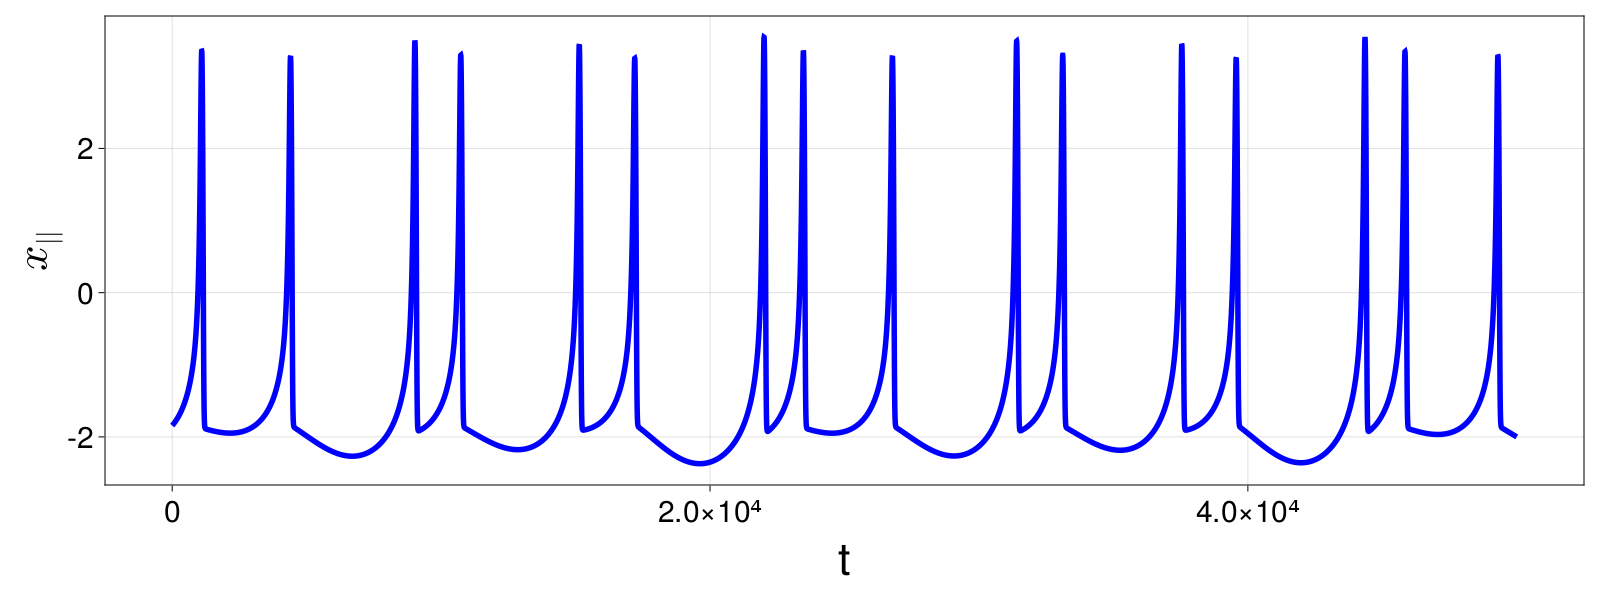

In [70]:
f = Figure(resolution = (1600, 600), fontsize = 35)
ax = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{||}",
xlabelsize = 45, ylabelsize = 45, xticklabelsize = 30, yticklabelsize = 30  )
lines!(xsum1[1:50000], linewidth = 5.5, color = "blue" )
f

## x1 = 0, plot k in x2 

In [6]:
ds = ds_HR2

pvalues = range(-0.5, stop = 0.5, length = 1000)
i = 1
plane = (2, 0.1)
tf = 2000.0
tr = 5000.0
p_index = 10

10

In [7]:
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = -0.5
parameter = -0.498998998998999
parameter = -0.497997997997998
parameter = -0.496996996996997
parameter = -0.495995995995996
parameter = -0.494994994994995
parameter = -0.493993993993994
parameter = -0.492992992992993
parameter = -0.491991991991992
parameter = -0.49099099099099097
parameter = -0.48998998998999
parameter = -0.488988988988989
parameter = -0.487987987987988
parameter = -0.486986986986987
parameter = -0.48598598598598597
parameter = -0.484984984984985
parameter = -0.48398398398398396
parameter = -0.482982982982983
parameter = -0.481981981981982
parameter = -0.48098098098098097
parameter = -0.47997997997998
parameter = -0.47897897897897895
parameter = -0.477977977977978
parameter = -0.476976976976977
parameter = -0.47597597597597596
parameter = -0.474974974974975
parameter = -0.47397397397397395
parameter = -0.47297297297297297
parameter = -0.471971971971972
parameter = -0.47097097097097096
parameter = -0.46996996996997
parameter = -0.46896896896896895
param

LoadError: InterruptException:

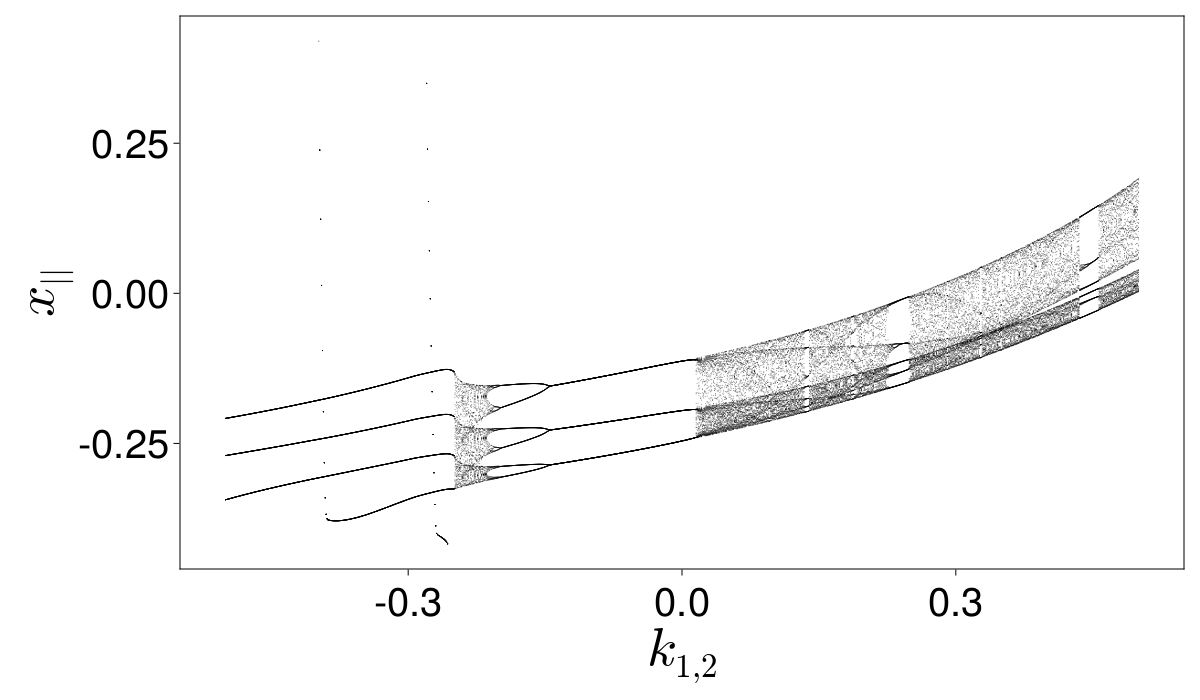

In [30]:
# L2
fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 55, ylabelsize = 55,
xticklabelsize = 40, yticklabelsize = 40  )



ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.0
    )
    
end

fig

In [22]:
ds = ds_HR2

pvalues = range(-0.5, stop = 0.5, length = 1000)
i = 4
plane = (2, 0.1)
tf = 2000.0
tr = 5000.0
p_index = 10

output1 = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = -0.5
parameter = -0.498998998998999
parameter = -0.497997997997998
parameter = -0.496996996996997
parameter = -0.495995995995996
parameter = -0.494994994994995
parameter = -0.493993993993994
parameter = -0.492992992992993
parameter = -0.491991991991992
parameter = -0.49099099099099097
parameter = -0.48998998998999
parameter = -0.488988988988989
parameter = -0.487987987987988
parameter = -0.486986986986987
parameter = -0.48598598598598597
parameter = -0.484984984984985
parameter = -0.48398398398398396
parameter = -0.482982982982983
parameter = -0.481981981981982
parameter = -0.48098098098098097
parameter = -0.47997997997998
parameter = -0.47897897897897895
parameter = -0.477977977977978
parameter = -0.476976976976977
parameter = -0.47597597597597596
parameter = -0.474974974974975
parameter = -0.47397397397397395
parameter = -0.47297297297297297
parameter = -0.471971971971972
parameter = -0.47097097097097096
parameter = -0.46996996996997
parameter = -0.46896896896896895
param

parameter = 0.0025025025025025025
parameter = 0.0035035035035035035
parameter = 0.0045045045045045045
parameter = 0.0055055055055055055
parameter = 0.0065065065065065065
parameter = 0.0075075075075075074
parameter = 0.00850850850850851
parameter = 0.00950950950950951
parameter = 0.010510510510510511
parameter = 0.011511511511511512
parameter = 0.012512512512512513
parameter = 0.013513513513513514
parameter = 0.014514514514514515
parameter = 0.015515515515515516
parameter = 0.016516516516516516
parameter = 0.017517517517517518
parameter = 0.018518518518518517
parameter = 0.01951951951951952
parameter = 0.02052052052052052
parameter = 0.021521521521521522
parameter = 0.02252252252252252
parameter = 0.023523523523523524
parameter = 0.024524524524524523
parameter = 0.025525525525525526
parameter = 0.026526526526526525
parameter = 0.027527527527527528
parameter = 0.028528528528528527
parameter = 0.02952952952952953
parameter = 0.03053053053053053
parameter = 0.03153153153153153
parameter = 

parameter = 0.25975975975975973
parameter = 0.26076076076076077
parameter = 0.26176176176176175
parameter = 0.2627627627627628
parameter = 0.26376376376376376
parameter = 0.26476476476476474
parameter = 0.26576576576576577
parameter = 0.26676676676676675
parameter = 0.2677677677677678
parameter = 0.26876876876876876
parameter = 0.2697697697697698
parameter = 0.2707707707707708
parameter = 0.27177177177177175
parameter = 0.2727727727727728
parameter = 0.27377377377377377
parameter = 0.2747747747747748
parameter = 0.2757757757757758
parameter = 0.27677677677677676
parameter = 0.2777777777777778
parameter = 0.27877877877877877
parameter = 0.2797797797797798
parameter = 0.2807807807807808
parameter = 0.28178178178178176
parameter = 0.2827827827827828
parameter = 0.28378378378378377
parameter = 0.2847847847847848
parameter = 0.2857857857857858
parameter = 0.28678678678678676
parameter = 0.2877877877877878
parameter = 0.2887887887887888
parameter = 0.2897897897897898
parameter = 0.2907907907

In [24]:
output_summ = output + output1;

In [12]:
CairoMakie.activate!()

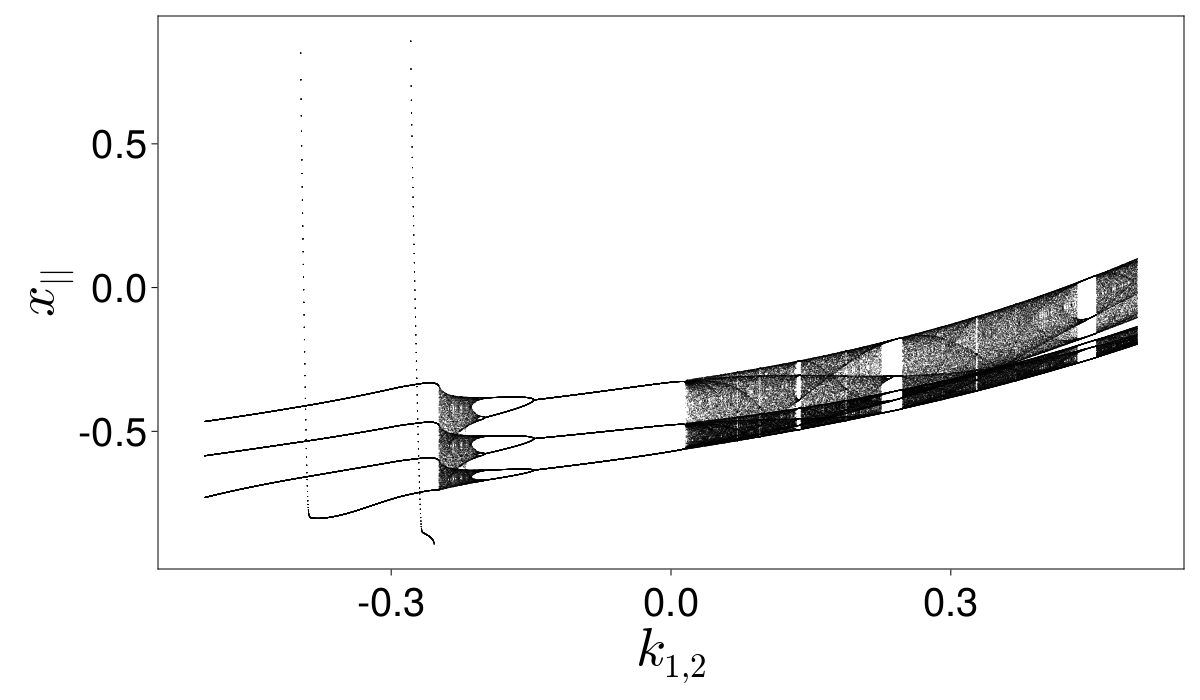

In [28]:
# L2
fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 55, ylabelsize = 55,
xticklabelsize = 40, yticklabelsize = 40  )



ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 0.5), markersize = 1.0
    )
    
end
# save("orbit_dia_L2.eps", fig)
fig